<a href="https://colab.research.google.com/github/ImperB-riven/Py4ds/blob/main/Bao_cao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cầu thủ 5 giải quốc gia hàng đầu Châu Âu

- Python cho Khoa Học Dữ Liệu
- Giảng Viên: TS. Nguyễn Tấn Trung

![](https://www.insidesport.com/upload/top-five-leagues-favourites.jpg)

**Thành viên**:
- Lê Hoàng Bảo - 19110035
- Lê Tường Vy - 19110519
- Võ Đức Trọng - 19110494


<u>**Giới thiệu**</u>: 

* Bóng đá là môn thể thao cực kì phổ biến của thế giới hiện nay, đặc biệt là $5$ giải quốc gia hàng đầu châu Âu: _Premier League (England)_, _Ligue 1 (France)_, _Bundesliga (Germany)_, _Serie A (Italy)_, _LaLiga (Spain)_.  
* Nhóm em đã crawl dữ liệu từ $5$ giải trên trang thống kê uy tín về thông tin của các cầu thủ. Qua đó, nhóm em sẽ xu hướng giá trị, quốc tịch, tuổi tác và câu lạc bộ của các cầu thủ ở từng giải. 
![](https://upload.wikimedia.org/wikipedia/commons/7/7b/Transfermarkt_logo.png)

## Crawl

In [ ]:
import requests 
from bs4 import BeautifulSoup as soup
import pandas as pd
from os.path import join

In [ ]:
def doc_url(url):
    rq = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}) 
    return soup(rq.text)

Vì website https://www.transfermarkt.com/ có chặn robot crawl data nên cần tạo một cái header với  User-Agent được định dạng thích hợp máy chủ của nó để giao tiếp máy khách-máy chủ.

headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}

In [ ]:
def crawl_data(url):
    dict_tr={}
    dict_tr['Player']=[]
    dict_tr['Market_value(m)'] =[]
    dict_tr['Position']=[]
    dict_tr['Age']=[]
    dict_tr['Nationality'] =[]
    dict_tr['Club']=[]
    index = -1
    for idx in range(1,5):
        path_url=join(url,str(idx))
        doc = doc_url(path_url)
        elements=doc.find(id="yw1").find("table", {"class":"items"}).find_all('td',{"class": "hauptlink"})
        i= 0
        for element in elements:
            if i%2!=1:
                dict_tr['Player'].append(element.get_text().replace('\n',''))
            else:dict_tr['Market_value(m)'].append(float(element.get_text().replace('€','').replace('m','')))
            i=i+1
        elements=doc.find(id="yw1").find("table", {"class":"items"}).find_all('table',{"class": "inline-table"})
        
        for element in elements:
            index =index + 1
            tp=dict_tr['Player'][index]
            dict_tr['Position'].append(element.get_text().replace('\n','').replace(tp,''))

        elements=doc.find(id="yw1").find("table", {"class":"items"}).find("tbody")
        temp2=elements.find_all("td",{"class":"zentriert"})
        count = 0
        for i in temp2:
            if count ==1:
                #contry
                dict_tr['Nationality'].append(i.find("img").get('title'))
                count= count+1
            elif count ==2:
                #age
                dict_tr['Age'].append(int(i.get_text()))
                count= count+1
            elif count ==3:
                #clb
                dict_tr['Club'].append(i.find("a").get('title'))
                count =0
            else:
                count= count+1
    return dict_tr

In [ ]:
from datetime import date
today = str(date.today()).replace('-','_')

#PREMIER_LEAGUE
url ='https://www.transfermarkt.com/premier-league/marktwerte/wettbewerb/GB1/ajax/yw1/page/'
pd.DataFrame(crawl_data(url)).to_csv(today+'_eng.csv', index = False)

#LALIGA
url = 'https://www.transfermarkt.com/jumplist/marktwerte/wettbewerb/ES1/ajax/yw1/page/'
pd.DataFrame(crawl_data(url)).to_csv(today+'_spa.csv', index = False)

#SERIE_A
url = 'https://www.transfermarkt.com/serie-a/marktwerte/wettbewerb/IT1/page/'
pd.DataFrame(crawl_data(url)).to_csv(today+'_ita.csv', index = False)

#BUNDESLIGA
url = 'https://www.transfermarkt.com/bundesliga/marktwerte/wettbewerb/L1/page/'
pd.DataFrame(crawl_data(url)).to_csv(today+'_ger.csv', index = False)

#LIGUE_1
url = 'https://www.transfermarkt.com/ligue-1/marktwerte/wettbewerb/FR1/page/'
pd.DataFrame(crawl_data(url)).to_csv(today+'_fra.csv', index = False)

## Phân tích 

Thư viện sử dụng

In [ ]:
!pip install dataprep

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from dataprep.clean import clean_country 

NumExpr defaulting to 2 threads.


Đọc data


In [ ]:
# data_eng = pd.read_csv('https://raw.githubusercontent.com/ImperB-riven/Py4ds/main/data/2022_01_19_eng.csv')
# data_fra = pd.read_csv('https://raw.githubusercontent.com/ImperB-riven/Py4ds/main/data/2022_01_19_fra.csv')
# data_ger = pd.read_csv('https://raw.githubusercontent.com/ImperB-riven/Py4ds/main/data/2022_01_19_ger.csv')
# data_ita = pd.read_csv('https://raw.githubusercontent.com/ImperB-riven/Py4ds/main/data/2022_01_19_ita.csv')
# data_spa = pd.read_csv('https://raw.githubusercontent.com/ImperB-riven/Py4ds/main/data/2022_01_19_spa.csv')
league = ['eng', 'fra', 'ger', 'ita', 'spa']
data_eng = pd.read_csv(today+'_'+league[0]+'.csv')
data_fra = pd.read_csv(today+'_'+league[1]+'.csv')
data_ger = pd.read_csv(today+'_'+league[2]+'.csv')
data_ita = pd.read_csv(today+'_'+league[3]+'.csv')
data_spa = pd.read_csv(today+'_'+league[4]+'.csv')
data_eng['League'] = 'ENG'
data_fra['League'] = 'FRA'
data_ger['League'] = 'GER'
data_ita['League'] = 'ITA'
data_spa['League'] = 'SPA'

In [ ]:
data = pd.concat([data_eng, data_fra, data_ger, data_ita, data_spa])
data = data.reset_index(drop=True)
data_total = [data, data_eng, data_fra, data_ger, data_ita, data_spa]

### Nationality

**Thống kê quốc tịch cầu thủ theo từng giải**

In [ ]:
nation = [i['Nationality'] for i in data_total] 
nation = pd.DataFrame(nation)
nation.index = ['All','Eng','Fra','Ger','Ita','Spa']
nation = nation.T

In [ ]:
index = ['Eng','Fra','Ger','Ita','Spa']
listNation = [pd.DataFrame(nation[i].value_counts()) for i in index]
listNation = listNation[0].T.append([i.T for i in listNation[1:]]) # merge lại 
listNation = listNation.replace(np.nan, 0) # Chuyển Nan về 0
listNation = listNation.round(0).astype(int) # chuyển float về int
listNation

,England,France,Portugal,Brazil,Spain,Belgium,Scotland,Germany,Argentina,Senegal,Denmark,Cote d'Ivoire,Guinea,Croatia,Nigeria,"Korea, South",United States,Czech Republic,Egypt,Norway,Turkey,Ghana,Colombia,Netherlands,Italy,Morocco,Algeria,Jamaica,Cameroon,Russia,Chile,Poland,Costa Rica,Canada,DR Congo,Austria,Switzerland,Mali,Hungary,Ecuador,Togo,Greece,Tunisia,Japan,Burkina Faso,Sweden,Serbia,Uruguay,Albania,Slovakia,Wales,Kosovo,Ukraine,Mexico,The Gambia,North Macedonia,Slovenia,Montenegro,Central African Republic,Peru,Venezuela
Eng,30,11,8,8,5,5,4,4,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fra,1,40,5,7,3,2,0,3,6,6,1,1,0,2,1,0,1,0,0,0,2,1,0,5,3,1,2,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ger,1,17,2,0,2,5,0,26,1,0,1,1,1,3,1,0,2,1,0,1,0,0,1,4,0,0,1,0,0,0,0,1,0,1,1,8,6,2,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ita,2,6,2,6,4,2,0,1,6,1,2,3,0,3,1,0,1,1,0,0,2,0,2,7,26,0,1,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,2,3,3,2,1,1,1,1,1,1,1,0,0,0,0,0
Spa,0,10,4,8,39,4,0,2,8,1,0,0,0,0,1,0,2,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,5,0,0,0,0,0,1,0,0,1,1,1,1,1


**<u>Barplot</u> để xem sự phân bố quốc tịch của các cầu thủ**

In [ ]:
distribution = pd.DataFrame(data['Nationality'].value_counts())
distribution = distribution.reset_index()
distribution.columns = ['Nationality', 'Number of Players']
bar_distribution = px.bar(distribution, x = 'Nationality', 
                          y = 'Number of Players', color='Number of Players')
bar_distribution.show()

**<u>Nhận xét</u>**: Những cường quốc bóng đá chiếm số lượng lớn các cầu thủ.

**<u>Bubble map</u> cho sự phân bố các cầu thủ theo quốc tịch**

In [ ]:
totalNation = distribution
totalNation = totalNation.reset_index(drop=True)
totalNation = clean_country(totalNation, 'Nationality', output_format="alpha-3")
totalNation.at[3, 'Nationality_clean'] = "GBR"
totalNation.columns = ['Nationality', 'Number of Players', 'iso_alpha']
totalNation = totalNation.dropna()
totalNation

Country Cleaning Report:
	58 values cleaned (95.08%)
	3 values unable to be parsed (4.92%), set to NaN
Result contains 58 (95.08%) values in the correct format and 3 null values (4.92%)


,Nationality,Number of Players,iso_alpha
0,France,84,FRA
1,Spain,53,ESP
2,Germany,36,DEU
3,England,34,GBR
4,Italy,30,ITA
5,Brazil,29,BRA
6,Argentina,24,ARG
7,Portugal,21,PRT
8,Netherlands,20,NLD
9,Belgium,18,BEL


In [ ]:
fig = px.scatter_geo(totalNation, locations = 'iso_alpha', hover_name = None, 
                     color = 'Nationality', size='Number of Players')
fig.show()

**Những cầu thủ ở các quốc gia ít cầu thủ sẽ có xu hướng chọn giải đầu nào?**  
<u>Lưu ý</u>: Chỉ lấy những quốc gia có một cầu thủ.

In [ ]:
def highlight(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_first = data == data.nlargest(1)[-1]
        return [attr if v else '' for v in is_first]
    else:  # from .apply(axis=None)
        is_first = data == data.nlargest(1).nlargest(1)[-1]
        return pd.DataFrame(np.where(is_first, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
fiveLeagueOne = distribution[distribution['Number of Players']==1]
values = list(fiveLeagueOne['Nationality'].values)
fiveLeagueOne = listNation[values]
fiveLeagueOne = fiveLeagueOne.T # chuyển vị
fiveLeagueOne.style.apply(highlight)

,Eng,Fra,Ger,Ita,Spa
Russia,0,1,0,0,0
North Macedonia,0,0,0,1,0
The Gambia,0,0,0,1,0
Ukraine,0,0,0,1,0
Peru,0,0,0,0,1
Venezuela,0,0,0,0,1
Central African Republic,0,0,0,0,1
Kosovo,0,0,0,1,0
Costa Rica,0,1,0,0,0
Jamaica,1,0,0,0,0


In [ ]:
df = pd.DataFrame(fiveLeagueOne)
df.sum()

Eng    3
Fra    3
Ger    5
Ita    6
Spa    5
dtype: int64

$\rightarrow$ Những quốc gia có ít cầu thủ trong 5 giải, đa số sẽ chọn **Serie A** để phát triển.

### Age

**Chia nhỏ độ tuổi thành 3 nhóm $<23$, $23-29$ và $>29$ để nhận xét**

In [ ]:
def percentAge(data):
  age22 = data['Age'].loc[data['Age']<23] 
  age2329 = data['Age'].loc[(22<data['Age']) & (data['Age']<30)]
  age30 = data['Age'].loc[data['Age']>29]

  percent = pd.DataFrame({'<23': len(age22)/len(data)*100, 
                          '23-29': len(age2329)/len(data)*100, 
                          '>29': len(age30)/len(data)*100}, index=[0])
  return percent

In [ ]:
def percent_Age(data):
  age22 = data['Age'].loc[data['Age']<23] 
  age2329 = data['Age'].loc[(22<data['Age']) & (data['Age']<30)]
  age30 = data['Age'].loc[data['Age']>29]

In [ ]:
age_percent_new = [percentAge(i) for i in data_total]
age_percent_new = pd.concat(age_percent_new)
s = pd.Series(['All','Eng','Fra','Ger','Ita','Spa'], index=[0,1,2,3,4,5]) 
age_percent_new['Name'] = s.values
age_percent_new=age_percent_new[['Name','<23','23-29','>29']] #đổi thứ tự cột
age_percent_new = age_percent_new.reset_index(drop=True)
age_percent_new

,Name,<23,23-29,>29
0,All,21.8,68.8,9.4
1,Eng,14.0,78.0,8.0
2,Fra,32.0,55.0,13.0
3,Ger,26.0,68.0,6.0
4,Ita,18.0,74.0,8.0
5,Spa,19.0,69.0,12.0


**<u>Barplot</u> cho tỉ trọng theo từng nhóm tuổi của các cầu thủ**

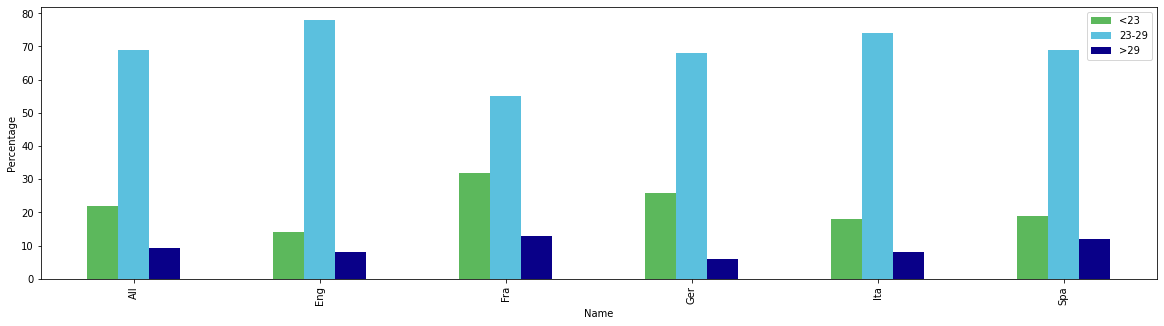

In [ ]:
colors = ['#5cb85c', '#5bc0de', '#090088']
age_percent_new.plot(kind='bar', x='Name', figsize=(20,5), color=colors, ylabel='Percentage')

**Những cầu thủ trẻ tuổi chiếm số đông ở những quốc gia, giải đấu**

Giai đoạn $<23$ tuổi

In [ ]:
Age_Y=data.loc[(data['Age'] < 23)]
# Age_Y["League"].value_counts()

Giai đoạn $23-29$ tuổi

In [ ]:
Age_M=data.loc[(data['Age'] >= 23) & (data['Age'] <= 29)]
# Age_M["League"].value_counts()

Giai đoạn $<29$

In [ ]:
Age_O=data.loc[(data['Age'] > 29)]
# Age_O["League"].value_counts()

**<u>Barplot</u> thể hiện số lượng cầu thủ ở từng nhóm tuổi trong 5 giải**

In [ ]:
Age_Y_plot = pd.DataFrame(Age_Y["League"].value_counts())
Age_M_plot = pd.DataFrame(Age_M["League"].value_counts())
Age_O_plot = pd.DataFrame(Age_O["League"].value_counts())

Text(0.5, 1.0, '>29')

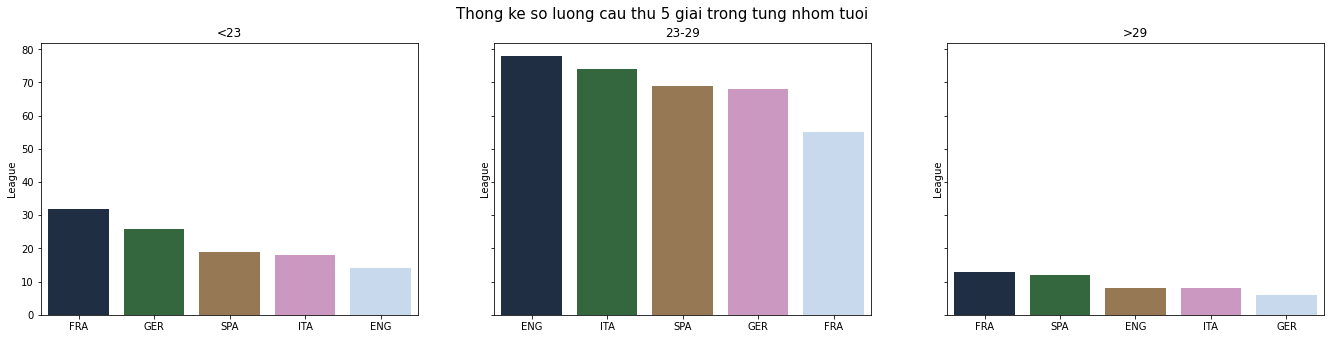

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(23, 5), sharey=True)
fig.suptitle('Thong ke so luong cau thu 5 giai trong tung nhom tuoi',fontsize=15, fontweight=10)
sns.barplot(ax=axes[0], x=Age_Y_plot.index, y="League", data=Age_Y_plot, palette = 'cubehelix')
axes[0].set_title("<23")
sns.barplot(ax=axes[1], x=Age_M_plot.index, y="League", data=Age_M_plot, palette = 'cubehelix')
axes[1].set_title("23-29")
sns.barplot(ax=axes[2], x=Age_O_plot.index, y="League", data=Age_O_plot, palette = 'cubehelix')
axes[2].set_title(">29")

> Đánh giá thứ hạng % tuổi:

- $<23$: ở độ tuổi này, việc có **một giải đấu ít cạnh tranh** để phát triển rất quan trọng. Bên cạnh đó suốt quá trình phát triển thì **Ligue1** (**Pháp**) và **Bundesliga** (**Đức**) thường chỉ được quan tâm bởi lượng **ít cổ động viên** và **không nhiều nguồn đầu tư mạnh mẽ**: PSG, Lyon, Bayern, Dortmund và một số **CLB mới nổi về đào tạo trẻ**: Monaco, Leibzig, Bayer04,... .Điều này làm cho các cầu thủ trẻ thoải mái hơn khi thi đấu ở các giải đấu này.
  
- $23-29$: đây là ***giai đoạn đỉnh cao***, các cầu thủ mong muốn được cọ sát ở các giải đấu lớn hơn, tầm cỡ hơn. Việc **Anh** là một giải đấu thoả mãn tất cả các tiêu chí đó: **tiền lương**, **truyền thông**, **danh hiệu**,... Việc này thu hút các cầu thủ trẻ muốn khẳng định mình. Còn ở **Ý**, nguyên nhân chính các cầu thủ trẻ đỉnh cao vẫn còn đa số vì họ **không thành công nếu ra nước ngoài**. Dớp từ các cầu thủ trẻ các lứa trước và **bản sắc, phong cách bóng đá Ý** đặc sản **thiên về phòng ngự** nên các cầu thủ chọn ở lại để ổn định. 
   
- $>29$: là **giai đoạn sườn dốc** của sự nghiệp. Các cầu thủ chọn **Tây Ban Nha** là điểm dừng chân hoặc các cầu thủ đã ở lại từ khi còn trẻ tới nay vì ở Tây Ban Nha có nhiều **CLB lớn nhất** về **quy mô**, **lượng fan**, **thành tích trong quá khứ**,... Còn ở **Ý**, nơi đây có ưu điểm về **chính sách y tế** tốt nhất trong 5 giải, kèm theo **nhịp độ các trận đấu không quá cao** làm cho việc thu hút các cầu thủ luống tuổi lớn hơn. Ví dụ như Ronaldo, Ibrahimovic, Bonucci,... 

**Đánh giá độ tuổi của từng giải**

In [ ]:
px.histogram(data, x = 'Age', y = 'Age', color = 'League', marginal = 'box')

**<u>Nhận xét</u>**:
* Histogram có dạng hình chuông, cho thấy số lượng cầu thủ theo độ tuổi tuân theo phân phối chuẩn. 
*   **Tuổi 24** là **giai đoạn bứt phá** từ cầu thủ trẻ lên một đẳng cấp cao hơn. Ở độ tuổi 23, họ sẽ thi đấu tốt và sau đó giá trị sẽ đột nhiên tăng vọt ở năm tiếp theo. Đó là lí do vì sau độ tuổi này chiếm số đông trong top 100.

### Club

**Nhận xét về số lượng cầu thủ giá trị cao của các CLB của mỗi giải đấu**

- **Giải Ngoại Hạng Anh (Premier league)**

In [ ]:
topclub_eng = data_eng[data_eng['Market_value(m)']>50].groupby('Club').count()["Player"].sort_values()[::-1]
topclub_eng = pd.DataFrame(topclub_eng).reset_index()
topclub_eng

,Club,Player
0,Manchester City,9
1,Liverpool FC,8
2,Manchester United,5
3,Chelsea FC,4
4,Tottenham Hotspur,2
5,Leicester City,2
6,West Ham United,1
7,Everton FC,1
8,Arsenal FC,1


In [ ]:
px.bar(topclub_eng, x='Club', y='Player')

**<u>Nhận xét</u>**: Ngoài 6 đội bóng lớn, thì các đội khác như Leicester, West Ham và Everton cũng góp mặt. Điều này minh chứng cho **sự khốc liệt ở giải Ngoại hạng Anh** - giải đấu hấp dẫn nhất hành tinh.

- **Giải Bóng đá Vô địch Quốc gia Pháp (LIGUE 1)**

In [ ]:
topclub_fra = data_fra[data_fra['Market_value(m)']>50].groupby('Club').count()["Player"].sort_values()[::-1]
topclub_fra = pd.DataFrame(topclub_fra).reset_index()
topclub_fra

,Club,Player
0,Paris Saint-Germain,7


**<u>Nhận xét</u>**: Điều này cho thấy ở Ligue1, có sự cách biệt lớn giữa PSG và các đội còn lại. Đây là điều dễ hiểu vì PSG có tiềm lực tài chính rất mạnh với nguồn tiền từ các ông chủ Ả Rập đổ vào.

- **Giải Bóng đá Vô địch Quốc gia Đức (Bundesliga)**

In [ ]:
topclub_ger = data_ger[data_ger['Market_value(m)']>50].groupby('Club').count()["Player"].sort_values()[::-1]
topclub_ger = pd.DataFrame(topclub_ger).reset_index()
topclub_ger

,Club,Player
0,Bayern Munich,8
1,Borussia Dortmund,2
2,RB Leipzig,1
3,Bayer 04 Leverkusen,1


In [ ]:
px.bar(topclub_ger, x='Club', y='Player')

**<u>Nhận xét</u>**: **Bayern Munich** là CLB lớn nhất và mạnh nhất ở **Đức**. Chính vì điều đó, CLB thu hút được đa phần các cầu thủ trẻ và các cầu thủ lớn vì khả năng đạt danh hiệu của họ rất cao. **Dortmund** và **Leverkusen** là các CLB đào tạo cầu thủ trẻ tốt. Mặc dù chỉ chiếm số lượng ít nhưng thực tế thì Top 4 cầu thủ giá trị nhất Bundesliga thì 3 trong số đó đã là của Dortmund và Leverkusen.

In [ ]:
data_ger.nlargest(7, 'Market_value(m)')

,Player,Market_value(m),Position,Age,Nationality,Club,League
0,Erling Haaland,150.0,Centre-Forward,21,Norway,Borussia Dortmund,GER
1,Joshua Kimmich,85.0,Defensive Midfield,26,Germany,Bayern Munich,GER
2,Jude Bellingham,75.0,Central Midfield,18,England,Borussia Dortmund,GER
3,Leroy Sané,70.0,Left Winger,26,Germany,Bayern Munich,GER
4,Leon Goretzka,70.0,Central Midfield,26,Germany,Bayern Munich,GER
5,Alphonso Davies,70.0,Left-Back,21,Canada,Bayern Munich,GER
6,Florian Wirtz,70.0,Attacking Midfield,18,Germany,Bayer 04 Leverkusen,GER


- **Giải Bóng đá Vô địch Quốc gia Ý (Serie A)**

In [ ]:
topclub_ita = data_ita[data_ita['Market_value(m)']>50].groupby('Club').count()["Player"].sort_values()[::-1]
topclub_ita = pd.DataFrame(topclub_ita).reset_index()
topclub_ita

,Club,Player
0,Inter Milan,4
1,SSC Napoli,2
2,Juventus FC,2
3,SS Lazio,1
4,ACF Fiorentina,1


In [ ]:
px.bar(topclub_ita, x='Club', y='Player')

**<u>Nhận xét</u>**: Inter vừa vô địch mùa trước nên giá trị các cầu thủ cao chiếm đa số. Các đội bóng Ý cũng đang **trở lại** sau một thời gian có phần lép vế so với các đội ở các giải khác. Họ được đầu tư mạnh mẽ và dần hội nhập với xu thế bóng đá thế giới so với thập niên trước.

In [ ]:
topclub_spa = data_spa[data_spa['Market_value(m)']>50].groupby('Club').count()["Player"].sort_values()[::-1]
topclub_spa = pd.DataFrame(topclub_spa).reset_index()
topclub_spa

,Club,Player
0,Real Madrid,7
1,FC Barcelona,3
2,Atlético de Madrid,3
3,Sevilla FC,1
4,Real Sociedad,1


In [ ]:
px.bar(topclub_spa, x='Club', y='Player')

**<u>Nhận xét</u>**: 3 đội bóng lớn nhất của TBN chiếm số đông trong Top giá trị các cầu thủ. 2 đội bóng nhỏ hơn cũng góp mặt chứng tỏ **sự vươn lên** cũng như khoảng cách của các đội bóng là không xa. Minh chứng cho điều này là việc top 7 hiện nay ở LaLiga còn chật chội hơn nữa với sự góp mặt của một vài đội bóng khác.
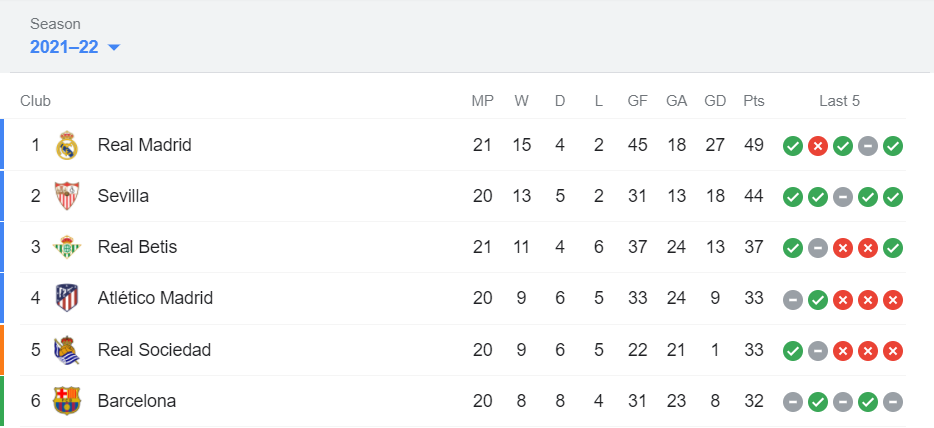

**So sánh số lượng cầu thủ giữa các CLB**

In [ ]:
playerClub = data.groupby('League')['Club'].value_counts().to_frame()
playerClub.columns = ['Number of Players']
playerClub = playerClub.reset_index()
top25playerClub = playerClub.nlargest(25, 'Number of Players')
px.bar(top25playerClub, x = 'Club', y = 'Number of Players', color = 'League')

**<u>Nhận xét</u>**: 
* **PSG** có rất nhiều cầu thủ giá trị cao, nhờ túi tiền không đáy của các ông chủ Ả Rập. Mặc dù vậy danh hiệu ở sân chơi châu lục là điều mà họ còn thiếu.
* Ở **Serie A**, trình độ các cầu thủ riêng và các CLB nói chung rất gần nhau, thế nên giải đấu có tận **6 đội** có nhiều cầu thủ giá trị.

### Position

**So sánh số lượng cầu thủ theo vị trí**

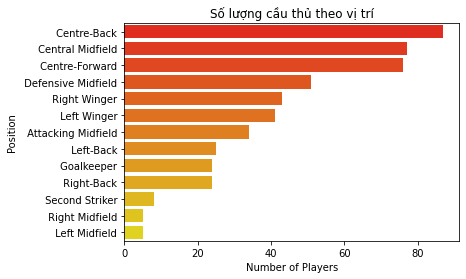

In [ ]:
position = pd.DataFrame(data['Position'].value_counts())
plot = sns.barplot(x='Position', y=position.index, data=position, palette="autumn")
plot.set(xlabel = 'Number of Players', ylabel = 'Position')
plt.title('Số lượng cầu thủ theo vị trí')
plt.show()

**<u>Nhận xét</u>**: 
> Với chiến thuật bóng đá hiện tại đề cao sự chắc chắn, các **vị trí trung tâm ở ba tuyến**, hay **trục dọc - xương sống của đội hình** đang chiếm ưu thế về số lượng. Trong đó các <u>trung vệ</u>, <u>tiền vệ trung tâm</u> rồi đến <u>tiền đạo trung phong</u> mới là những vị trí chiếm số lượng trong top 5 league. Đặc biệt xu thế bóng đá hiện nay, các trung vệ ***không chỉ là những hòn đá tảng trước cầu môn***, mà còn là ***những chân kiến tạo từ tuyến dưới hoặc sắm vai tiền đạo ở những tình huống cố định***. Chính vì vậy, họ đang được coi trọng và được đầu tư thật sự nghiêm túc không thua gì các vị trí tấn công.

**Các cầu thủ giá trị nhất theo vị trí và quốc gia**

In [ ]:
topValueOfNation = data[0:0]
for i in set(data['Nationality']):
  temp = data[data['Nationality']==i].nlargest(1, 'Market_value(m)')
  topValueOfNation = topValueOfNation.append(temp, ignore_index=True)
topValueOfNation

,Player,Market_value(m),Position,Age,Nationality,Club,League
0,Vinicius Junior,100.0,Left Winger,21,Brazil,Real Madrid,SPA
1,Mateo Kovacic,45.0,Central Midfield,27,Croatia,Chelsea FC,ENG
2,Federico Valverde,65.0,Central Midfield,23,Uruguay,Real Madrid,SPA
3,Sadio Mané,80.0,Left Winger,29,Senegal,Liverpool FC,ENG
4,Aleksandr Golovin,25.0,Attacking Midfield,25,Russia,AS Monaco,FRA
...,...,...,...,...,...,...,...
56,Milan Skriniar,65.0,Centre-Back,26,Slovakia,Inter Milan,ITA
57,Achraf Hakimi,70.0,Right-Back,23,Morocco,Paris Saint-Germain,FRA
58,Musa Barrow,20.0,Left Winger,23,The Gambia,Bologna FC 1909,ITA
59,Joshua Kimmich,85.0,Defensive Midfield,26,Germany,Bayern Munich,GER


In [ ]:
px.scatter(topValueOfNation, x='Nationality', y='Market_value(m)', 
           size='Market_value(m)', color='Position', symbol = 'Position')

**<u>Nhận xét</u>**: 
* Số lượng các **tiền vệ trung tâm** (Central Midfield) có giá trị cao ở mỗi quốc gia rất đông. 
* Những **cầu thủ tấn công** (Central Forward, Left & Right Winger, Attacking Midfield) có giá trị rất cao so với các vị trí khác, đặc biệt là Central Midfield.

### Market value

**Top 100 giá trị cầu thủ**

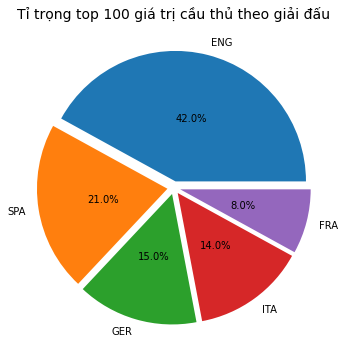

In [ ]:
marketValue = data.nlargest(100, 'Market_value(m)')
marketValue = marketValue.reset_index(drop=True)
marketValue = pd.DataFrame(marketValue['League'].value_counts())
marketValue = marketValue.reset_index()
marketValue.columns = ['League', 'Number of Players']
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = marketValue['Number of Players'], autopct="%.1f%%", 
        explode=[0.05]*len(marketValue), labels = marketValue['League'], pctdistance=0.5)
plt.title("Tỉ trọng top 100 giá trị cầu thủ theo giải đấu", fontsize=14)
plt.show()

**<u>Nhận xét</u>**: 
* **Anh** là giải đấu **hấp dẫn nhất hành tinh**, nên việc các cầu thủ tập trung nhiều là điều dễ hiểu. Họ được đảm bảo về **tiền lương**, **sự nổi tiếng** cũng như sân chơi để thể hiện **khả năng bản thân**.
* **Tây Ban Nha** là nơi có 3 CLB lớn: Real Madrid, Barcelona và Atletico Madrid. Họ là những **CLB lớn nhất** theo suốt chiều dài lịch sử hình thành bóng đá, nên đây là nơi cầu thủ vươn tầm khẳng định tầm vóc của mình.
* **Đức** là đất nước có các CLB **đào tạo cầu thủ trẻ** tốt với *cơ sở vật chất*, *chuyên môn và kỷ luật cao*.
* **Ý** là đất nước có nhiều **CLB truyền thống** tên tuổi đang dần trở lại sân chơi châu lục sau nhiều năm vắng bóng.
* **Pháp** vẫn còn xếp sau và **chưa được đánh giá cao** về mặt **chuyên môn**. Cầu thủ Pháp rất hay, tuy nhiên họ chỉ tập trung phần lớn ở PSG, Monaco, Lyon,...

**Thống kê tổng số cầu thủ và giá trị theo quốc gia**

In [ ]:
temp1 = pd.DataFrame(data.groupby(['Nationality'])['Market_value(m)'].sum())
temp1 = temp1.reset_index()
temp1 = temp1.sort_values('Nationality')
temp1['Market_value(m)'] = temp1['Market_value(m)'].astype('int')
temp1

,Nationality,Market_value(m)
0,Albania,40
1,Algeria,120
2,Argentina,690
3,Austria,225
4,Belgium,598
...,...,...
56,Ukraine,30
57,United States,180
58,Uruguay,248
59,Venezuela,18


In [ ]:
totalNation = distribution
totalNation = totalNation.reset_index(drop=True)
totalNation = clean_country(totalNation, 'Nationality', output_format="alpha-3")
totalNation.at[3, 'Nationality_clean'] = "GBR"
totalNation.columns = ['Nationality', 'Number of Players', 'iso_alpha']
totalNation = totalNation.sort_values('Nationality')
totalNation = totalNation.reset_index(drop=True)
playerNation = totalNation.T.append(temp1['Market_value(m)'])
playerNation = playerNation.T
playerNation = playerNation.reset_index(drop=True)
playerNation = playerNation.dropna()
# playerNation

Country Cleaning Report:
	58 values cleaned (95.08%)
	3 values unable to be parsed (4.92%), set to NaN
Result contains 58 (95.08%) values in the correct format and 3 null values (4.92%)


In [ ]:
playerNation['Number of Players'] = playerNation['Number of Players'].astype('int')
top10value = playerNation.nlargest(10, 'Number of Players')
#top10value

playerNation['Market_value(m)'] = playerNation['Market_value(m)'].astype('int')
top10marketvalue = playerNation.nlargest(10, 'Market_value(m)')

In [ ]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=["TOP 10 MARKET VALUE",
                                    "TOP 10 NUMBER of PLAYERS"]
                   )
fig.add_trace(go.Bar(x=top10marketvalue['Nationality'],
                     y=top10marketvalue['Market_value(m)'],
                     name="Market value(m)"),
             row=1, col=1)
fig.add_trace(go.Bar(x=top10value['Nationality'],
                     y=top10value['Number of Players'],
                     name="Number of Players(people)"),
             row=1, col=2)
fig.show()

**<u>Nhận xét</u>**: 
* Ta thấy top 10 của giá trị cầu thủ lẫn top 10 số cầu thủ theo mỗi quốc gia **không có nước khác** (thứ tự thay đổi). Tất cả 10 nước đều là các **cường quốc bóng đá** và luôn có các thứ hạng cao ở các đầu trường quốc tế. Ví dụ: Pháp (World Cup 2018, UEFA Nation League 2020), Bồ Đào Nha (Euro 2016, UEFA Nation League 2018), Italy (Euro 2020),...
* **Pháp** mặc dù đều ở vị trí cao nhất của 2 top 10 chứng tỏ khoảng cách rõ rệt của Pháp với các nước còn lại: **lực lượng dồi dào**, **giá trị cao**, **các chức vô địch**, **cầu thủ từ châu Phi**...
* **Ý** cũng đang trở lại thời hoàng kim sau hơn một thập niên lép vế. Chức vô địch Euro 2020 đã nói lên điều đó. Tuy nhiên không như Pháp, Italy **không thoáng các vấn đề nhập tịch** nên điều này cản trở sự phát triển của họ.
* **Anh** mặc dù có lượng ít cầu thủ hơn Pháp (**34-84**), tuy nhiên tổng giá trị của họ lại rất cao (rank 2). Qua đây cho thấy Anh có cách làm marketing rất tốt. Tuy nhiên, họ lại trắng tay suốt một khoảng thời gian dài mặc dù, bóng đá là do họ khai sinh.
* **Tây Ban Nha** cũng đang trở lại mạnh mẽ. Sau chức vô địch World Cup 2010, họ dần tụt lại phía sau (một phần vì **sự đổi mới của chiến thuật**). Mặc dù vậy, lứa **cầu thủ trẻ** đang là nòng cốt và góp công không nhỏ trong việc đạt được Á quân Olympic 2020 và UEFA Nation League 2020 đã cho thấy Tây Ban Nha đang đổi mới.
* Bên cạnh đó, các quốc gia khác với nhiều **cầu thủ trụ cột ở các CLB hàng đầu** cũng góp phần vào thứ hạng trên.

**Những cầu thủ giá trị của mỗi quốc gia ở từng giải đấu**

In [ ]:
px.scatter(topValueOfNation, x='League', y='Market_value(m)', 
           size='Market_value(m)', marginal_y='rug')

**<u>Nhận xét</u>**:
* **Pháp** có sự chênh lệch lớn về giá trị cầu thủ.
* **Anh**, **Tây Ban Nha** và **Ý** có sự phân bố đều hơn giữa giá trị các cầu thủ hàng đầu.
* **Đức** là nơi có khả năng đào tạo cầu thủ tốt, nên giá trị của họ cao và đều chủ yếu nằm ở năng lực của mỗi cầu thủ.

# Kết luận



1. **<u>Quốc tịch</u>**:  
Các **cường quốc bóng đá** chiếm lượng lớn các cầu thủ giá trị, có thể kể đến: Anh, Brazil, Pháp, Đức,... Có đến **61 quốc gia** có cầu thủ giá trị ở 5 giải quốc gia hàng đầu châu Âu, tập trung chủ yếu ở **châu Âu**, **Nam Mỹ** và **Tây Phi**.
2. **<u>Độ tuổi</u>**:  
Các cầu thủ ở **lứa tuổi 23-29** chiếm đa số, đặc biệt là ở độ **tuổi 24** - lứa tuổi chuyển giao từ cầu thủ trẻ thành cầu thủ đẳng cấp cao hơn. Các **cầu thủ trẻ** ngày càng nhiều cho thấy khả năng cũng như các chính sách đào tạo đã cho quả ngọt. Bên cạnh đó, các **cầu thủ luống tuổi** vẫn còn đỉnh cao như Ronaldo (36), Messi (34),... vẫn còn thi đấu, thể hiện các quá trình luyện tập và sức khoẻ cầu thủ đã được nâng cao rất nhiều.
3. **<u>Club</u>**:  
Các **CLB hàng đầu** luôn chiếm số lượng lớn các cầu thủ có giá trị. Một vài CLB nhỏ hơn nhưng **đào tạo cầu thủ trẻ tốt** và các CLB cũng chịu **chi tiền** hơn để mua sắm giúp cho khoảng cách giữa các đội bóng được thu hẹp và làm cho giải đấu càng có sức hút trên thế giới.
4. **<u>Position</u>**:  
Vị trí ảnh hưởng đến giá trị cầu thủ là biểu hiện cho sự thay đổi của **chiến thuật bóng đá hiện tại**: đề cao sự chắc chắn, triết lý kiểm soát bóng, phát động tấn công từ hàng thủ, ưu tiên sử dụng cầu thủ wing-back.
5. **<u>Market value</u>**:  
Chất lượng giải đấu cũng như các yếu tố bên lề: tiền lương, truyền thông, chuyên môn,... cũng ảnh hưởng nhiều đến giá trị cầu thủ. Một giải đấu có **chuyên môn cao**, **truyền thông tốt**, CLB trả **lương hậu hĩnh** luôn thu hút được các cầu thủ hàng đầu. Minh chứng rõ ràng nhất là Premier League.


